In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [2]:
house_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
house_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
house_data.shape

(1460, 81)

In [5]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


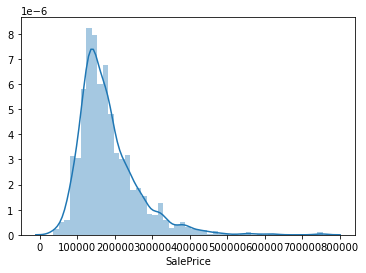

In [8]:
sns.distplot(house_data['SalePrice'])

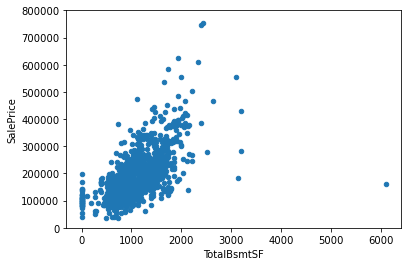

In [9]:
var = 'TotalBsmtSF'
data = pd.concat([house_data['SalePrice'], house_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

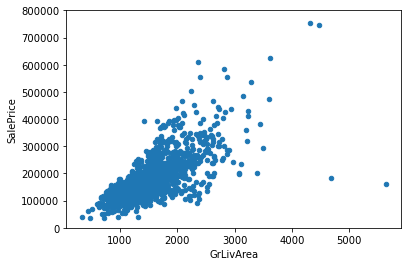

In [10]:
var = 'GrLivArea'

data = pd.concat([house_data['SalePrice'], house_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

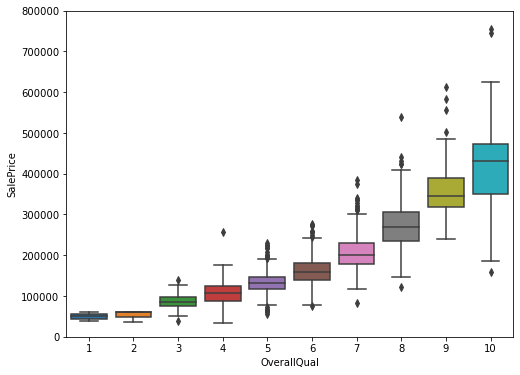

In [11]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = house_data[['SalePrice', var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

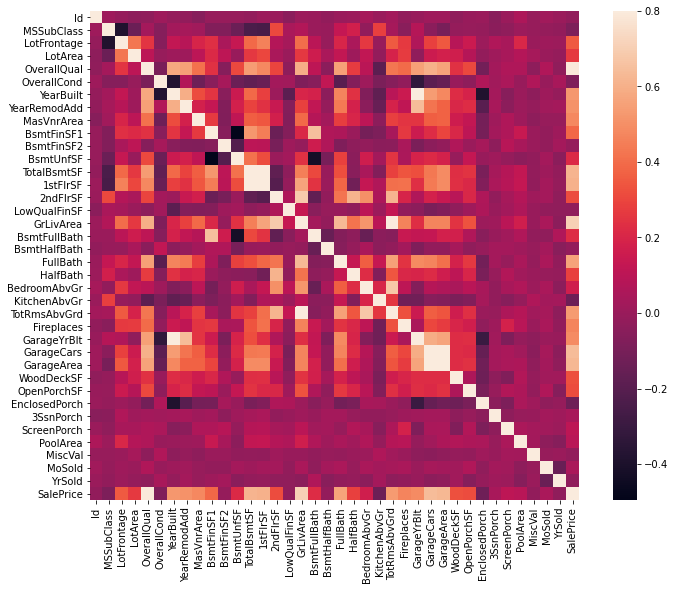

In [12]:
corrmat = house_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

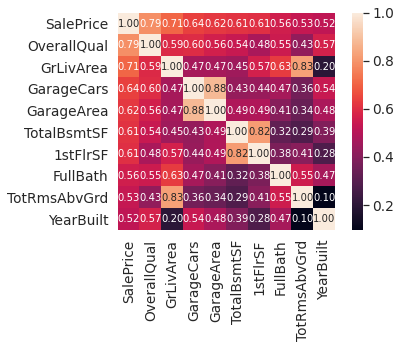

In [13]:
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Most correlated with 'SalePrice':
1. OverallQual
2. GrLivArea
3. GarageCars
4. GarageArea
5. TotalBmstSF

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


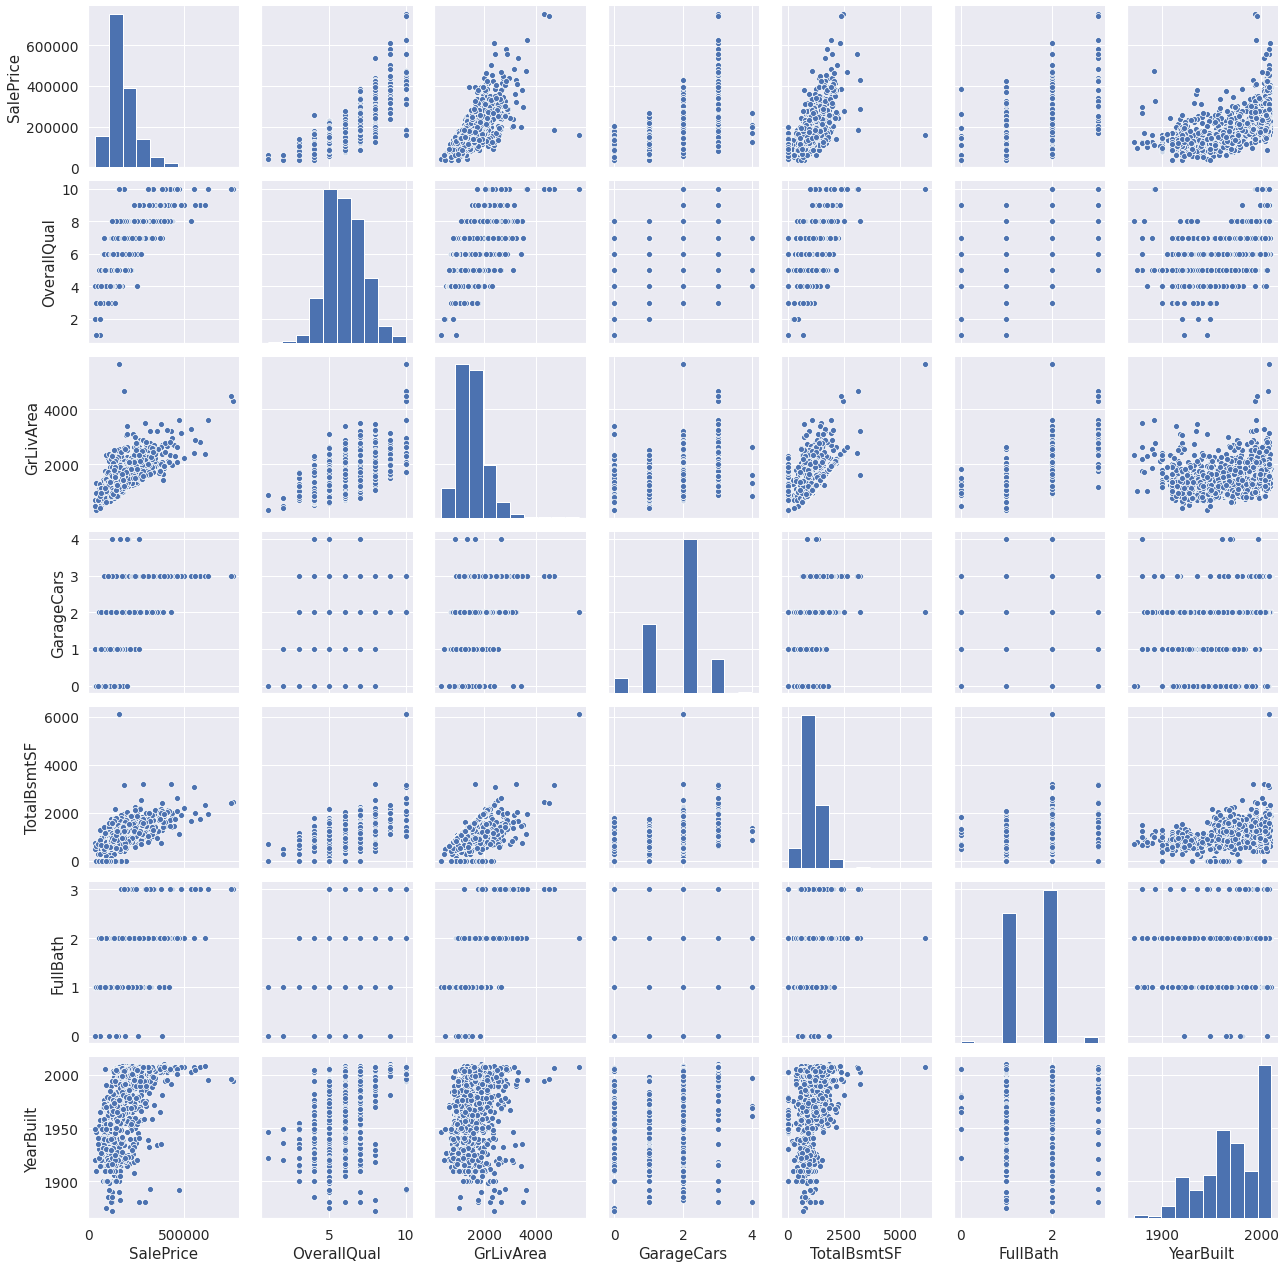

In [14]:
import seaborn as sns
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_data[cols], size = 2.5)
plt.show();

In [15]:
total = house_data.isnull().sum().sort_values(ascending=False)
percent = (house_data.isnull().sum()/house_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [16]:
house_data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [17]:
house_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [18]:
(house_data.columns[house_data.dtypes != 'object'])

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')








# Linear Regression 


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:


numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = house_data.columns[house_data.dtypes == 'object']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(house_data[house_data.columns.drop('SalePrice')], house_data['SalePrice'], test_size=0.2, random_state=51)

reg.fit(X_train, y_train)
print("model score: %.3f" % reg.score(X_test, y_test))
print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test)))


model score: 0.782
model mae: 18257.047
model mse: 1337772666.068


# Ridge Regression

In [21]:
from sklearn.linear_model import Ridge
numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = house_data.columns[house_data.dtypes == 'object']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', Ridge())])

X_train, X_test, y_train, y_test = train_test_split(house_data[house_data.columns.drop('SalePrice')], house_data['SalePrice'], test_size=0.2, random_state=51)

reg.fit(X_train, y_train)
print("model score: %.3f" % reg.score(X_test, y_test))
print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test)))



model score: 0.821
model mae: 18049.470
model mse: 1100507955.650


# Lasso Method

In [22]:
from sklearn import linear_model
from sklearn.linear_model import Lasso

In [23]:
from sklearn.linear_model import Ridge
numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = house_data.columns[house_data.dtypes == 'object']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', Lasso())])

X_train, X_test, y_train, y_test = train_test_split(house_data[house_data.columns.drop('SalePrice')], house_data['SalePrice'], test_size=0.2, random_state=51)

reg.fit(X_train, y_train)
print("model score: %.3f" % reg.score(X_test, y_test))
print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test)))

model score: 0.779
model mae: 18217.275
model mse: 1356505279.917


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1169510270.180664, tolerance: 741212390.0502273
  max_iter, tol, rng, random, positive)


# Changing Features


In [24]:
house_data.dtypes['OverallQual']
house_data.dtypes['GrLivArea']
house_data.dtypes['GarageCars']
house_data.dtypes['GarageArea']
house_data.dtypes['TotalBsmtSF']
house_data.dtypes['YearBuilt']



dtype('int64')

In [25]:
selected_features = {'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'YearBuilt'}

In [26]:
numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = house_data.columns[house_data.dtypes == 'object']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, list(set(numeric_features).intersection(selected_features))),
        ('cat', categorical_transformer, list(set(categorical_features).intersection(selected_features)))])


reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', Ridge())])

X_train, X_test, y_train, y_test = train_test_split(house_data[house_data.columns.drop('SalePrice')], house_data['SalePrice'], test_size=0.2, random_state=51)
X_train = X_train[list(selected_features)]
X_test = X_test[list(selected_features)]
reg.fit(X_train, y_train)
print("model score: %.3f" % reg.score(X_test, y_test))
print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test)))

model score: 0.713
model mae: 27427.778
model mse: 1765083108.846


# ElasticNet

In [27]:
from sklearn.linear_model import ElasticNet
numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = house_data.columns[house_data.dtypes == 'object']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', ElasticNet())])

X_train, X_test, y_train, y_test = train_test_split(house_data[house_data.columns.drop('SalePrice')], house_data['SalePrice'], test_size=0.2, random_state=51)

reg.fit(X_train, y_train)
print("model score: %.3f" % reg.score(X_test, y_test))
print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test)))

model score: 0.800
model mae: 20441.007
model mse: 1230219553.752


# Polynomial Features

In [28]:
selected_features = {'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF'}

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:

numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()), 
    ('poly', PolynomialFeatures(2))])

categorical_features = house_data.columns[house_data.dtypes == 'object']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, list(set(numeric_features).intersection(selected_features))),
        ('cat', categorical_transformer, list(set(categorical_features).intersection(selected_features)))])


reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', Ridge())])

X_train, X_test, y_train, y_test = train_test_split(house_data[house_data.columns.drop('SalePrice')], house_data['SalePrice'], test_size=0.2, random_state=51)
X_train = X_train[list(selected_features)]
X_test = X_test[list(selected_features)]
reg.fit(X_train, y_train)
print("model score: %.3f" % reg.score(X_test, y_test))
print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test)))

model score: 0.680
model mae: 23962.744
model mse: 1968732327.646
